In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [36]:

#  Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [37]:

#  Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [38]:
# Normalize the images (scaling pixel values to [0,1])
x_train = x_train / 255.0
x_test = x_test / 255.0


In [39]:

#  Define the class names for better visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
#  Display a sample image
plt.figure(figsize=(4,4))
plt.imshow(x_train[0], cmap='gray')
plt.title(class_names[y_train[0]])
plt.show()

In [40]:
# Build the Neural Network model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),   # Flatten 2D image to 1D vector
    layers.Dense(128, activation='relu'),   # Hidden layer with 128 neurons
    layers.Dense(64, activation='relu'),    # Another hidden layer
    layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

In [42]:
#  Compile the model
model.compile(
    optimizer='adam',                       # Adam optimizer (auto learning rate)
    loss='sparse_categorical_crossentropy', # Suitable for integer labels
    metrics=['accuracy']                    # Track accuracy
)

In [43]:
#  Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.1,   # Use 10% of training data for validation
    batch_size=32,
    verbose=1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7772 - loss: 0.6441 - val_accuracy: 0.8575 - val_loss: 0.3884
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8634 - loss: 0.3758 - val_accuracy: 0.8567 - val_loss: 0.3827
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8770 - loss: 0.3388 - val_accuracy: 0.8688 - val_loss: 0.3532
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8860 - loss: 0.3111 - val_accuracy: 0.8788 - val_loss: 0.3336
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8892 - loss: 0.2952 - val_accuracy: 0.8790 - val_loss: 0.3275
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8960 - loss: 0.2771 - val_accuracy: 0.8768 - val_loss: 0.3503
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8997 - loss: 0.2667 - val_accuracy: 0.8848 - val_loss: 0.3199
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9039 - loss: 0.2581 - 

In [44]:
#  Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)


313/313 - 1s - 2ms/step - accuracy: 0.8829 - loss: 0.3436

Test accuracy: 0.8828999996185303


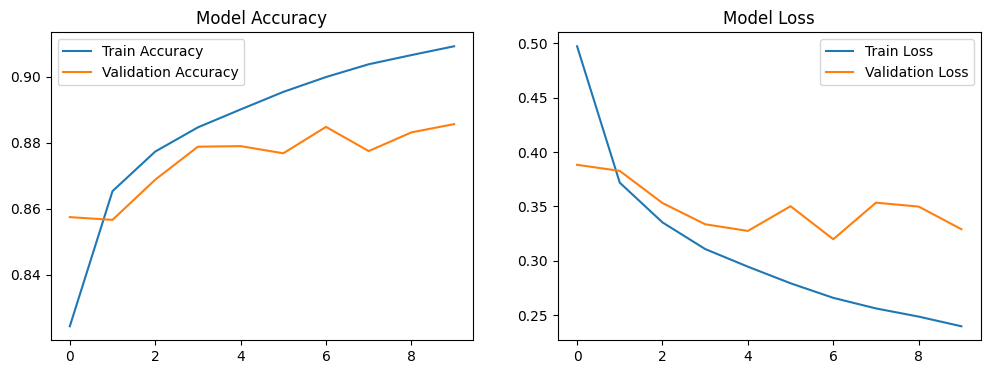

In [51]:
# Plot training accuracy and loss
plt.figure(figsize=(12, 4))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [48]:
# Make predictions on test data
predictions = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


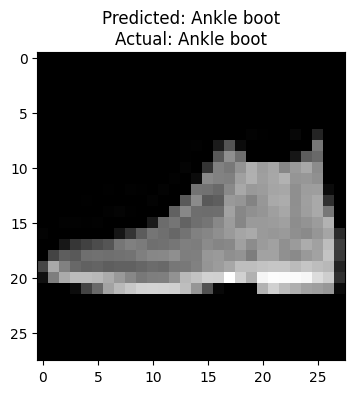

In [49]:
# Display one example prediction
plt.figure(figsize=(4,4))
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {class_names[predictions[0].argmax()]}\nActual: {class_names[y_test[0]]}")
plt.show()